# Classifying Whiskies 
We have two files the regions file contains the regions in which each of the whiskies produced.
the whiskies file contains all other details about the whiskies.
So first let's investigate the data

In [1]:
import pandas as pd
import numpy as np

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")

whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [2]:
whisky.iloc[0:10] #first 10 rows

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


In [3]:
whisky.iloc[5:10, 0:5]#rows from 5 to 10, and columns from 0 to 5.

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [4]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

We would like to look at all of the columns starting from body
and ending at floral, floral included.


In [5]:
flavors = whisky.iloc[:, 2:14]
flavors.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


The **correlations** of different flavor attributes.
In other words, we'd like to learn whether whiskies that score high on, say, sweetness also score high on the honey attribute.

We'll be using the core function to compute correlations across the columns of a data frame.
There are many different kinds of correlations, and by default, the function uses what is called **Pearson correlation** which estimates **linear correlations** in the data.
In other words, if you have measured attributes for two variables,let's call them x and y the Pearson correlation coefficient between x and y approaches plus 1 as the points in the xy scatterplot approach
a straight upward line.

But what is the interpretation of a correlation coefficient in this specific context?
A large positive correlation coefficient indicates that the two flavor attributes in question
tend to either increase or decrease together.
In other words, if one of them has a high score we would expect the other, on average, also to have a high score.

**For example, heavy body is associated with smokiness.In contrast, it seems that a floral flavor is the opposite of full body**

In [6]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.pcolor(corr_flavors)
plt.colorbar()
plt.show()


<Figure size 640x480 with 2 Axes>

In [8]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
corr_whisky

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.000000,0.708632,0.697354,-0.147311,0.731902,3.890863e-01,4.643121e-01,0.823842,0.713395,0.310460,...,0.463332,-0.021124,8.010601e-01,0.463332,0.163033,0.662651,0.543305,5.047526e-01,5.721858e-01,0.267222
1,0.708632,1.000000,0.503074,-0.228591,0.511834,4.009832e-01,4.608302e-01,0.793052,0.510144,0.242821,...,0.455573,0.132175,6.587581e-01,0.269202,0.132014,0.467396,0.607054,6.316546e-01,3.723415e-01,0.483030
2,0.697354,0.503074,1.000000,-0.140435,0.557020,3.896275e-01,7.304649e-01,0.647298,0.846651,0.502091,...,0.631008,0.014384,8.571804e-01,0.631008,0.280806,0.828621,0.343536,5.458910e-01,3.584573e-01,0.303273
3,-0.147311,-0.228591,-0.140435,1.000000,0.231617,1.231300e-01,-4.306744e-01,-0.216957,-0.009969,0.436534,...,0.032372,0.898820,-3.470028e-01,-0.016186,0.417436,-0.100172,0.151838,-3.920737e-01,1.455173e-01,-0.101649
4,0.731902,0.511834,0.557020,0.231617,1.000000,2.862513e-01,2.860648e-01,0.679366,0.691939,0.485363,...,0.413919,0.301941,5.316095e-01,0.413919,0.068539,0.559690,0.693375,4.243967e-01,6.951817e-01,0.424397
5,0.389086,0.400983,0.389627,0.123130,0.286251,1.000000e+00,2.433196e-01,0.481543,0.425922,0.479186,...,0.502956,0.280900,4.782609e-01,0.502956,0.637630,0.297537,0.589768,5.076300e-01,3.043478e-01,0.507630
6,0.464312,0.460830,0.730465,-0.430674,0.286065,2.433196e-01,1.000000e+00,0.421076,0.704248,0.335212,...,0.681689,-0.252646,6.995439e-01,0.681689,0.216653,0.784527,0.025786,5.918492e-01,-6.082991e-02,0.434023
7,0.823842,0.793052,0.647298,-0.216957,0.679366,4.815434e-01,4.210760e-01,1.000000,0.643268,0.408248,...,0.522233,0.037037,7.223151e-01,0.348155,0.050443,0.443607,0.612372,5.726371e-01,7.223151e-01,0.572637
8,0.713395,0.510144,0.846651,-0.009969,0.691939,4.259217e-01,7.042477e-01,0.643268,1.000000,0.525226,...,0.699866,0.107211,7.744031e-01,0.615882,0.275813,0.876457,0.328266,3.516153e-01,5.033620e-01,0.452077
9,0.310460,0.242821,0.502091,0.436534,0.485363,4.791864e-01,3.352119e-01,0.408248,0.525226,1.000000,...,0.852803,0.612372,1.474420e-01,0.772853,0.710472,0.271653,0.437500,2.869095e-01,4.054654e-01,0.573819


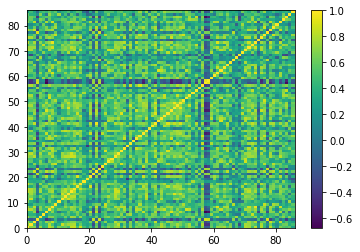

In [9]:
plt.figure()
plt.pcolor(corr_whisky)
plt.colorbar()
plt.show()

Next we're going to cluster whiskeys based on their flavor profiles.
We'll do this using **SpectralCoclustering** from the scikit-learn machine learning
module.

For example The goal is to find clusters that consist of sets of words and sets of documents that often go together.
An extreme example would be books written in different languages.We can also think about documents that deal with specific scientific fields,such as biology or physics.
The term **co-clustering refers** to the idea that we simultaneously find both clusters of words and clusters of documents.

So again, each cluster consists of both words and documents.
We can first a graph as what is called an **adjacency matrix**, where the rows correspond to words
and the columns correspond to documents.
Any given element of this matrix represents the number of times a given word appears in the given document.
We can then take this matrix, manipulate it in certain ways,and find an approximate solution to the stated clustering problem, in terms of **eigenvalues and eigenvectors** of this modified matrix.
We will not go into the details here, but the term spectral refers to the use of eigenvalues and eigenvectors of some matrix,and this is the meaning of the term spectral in spectral co-clustering.
We can think of the co-clustering technique as simultaneous clustering the rows and columns of matrix, whatever they happen to represent.

In this case, we'll be using the approach to find clusters of whiskeys in our correlation matrix of whiskey flavors.
This method effectively re-orders the rows and columns of the correlation matrix so that we can see blocks corresponding to groups of whiskeys more clearly.

Since that whiskeys in the dataset come from six different regions, we're going to ask the clustering algorithm to find six blocks.

The output is  number of row clusters times number of rows in the data matrix Each row in this array identifies a cluster, here ranging from 0 to 5, and each column identifies a row in the correlation matrix,here ranging from 0 to 85.

In [10]:
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters = 6, random_state = 0)
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

If we sum all of the columns of this array, we can find out how many observations belong to each cluster.
Remember, axis 0 is rows, axis equal to 1 is columns so we use 1.
For example, here, 19 whiskeys belong to cluster number 2.

In [11]:
np.sum(model.rows_, axis = 1)

array([20,  5, 19, 17,  6, 19])

If instead we sum all of the rows, we can find out how many clusters belong to each observation.
Because each observation belongs in just one of the six clusters, the answer should be 1 for all of them.

In [12]:
np.sum(model.rows_, axis = 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Observation number 0 belongs to cluster number 5, observation number 1 belongs to cluster number 2, and so on.
All of the entries in the array have to be numbers between 0 and 5 because we specified 6 clusters.


In [13]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0],
      dtype=int32)

Let's draw the clusters as groups that we just discovered in our whisky DataFrame.
Let's also rename the indices to match the sorting.We have to reshuffled the rows and columns of the table.

We first extract the group labels from the model and append them to the whisky table.
We also specify their index explicitly.

In [14]:
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands,3
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands,2
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside,0
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside,2
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0


We then reorder the rows in increasing order by group labels.
These are the group labels that we discovered using spectral co-clustering.
Finally, we reset the index of our DataFrame.

In [15]:
whisky = whisky.iloc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
81,47,Glengoyne,1,2,0,0,0,1,1,1,2,2,3,2,G63 9LB,252810,682750,Highlands,5
82,32,Edradour,2,3,1,0,0,2,1,1,4,2,2,2,PH16 5JP,295960,757940,Highlands,5
83,36,GlenGrant,1,2,0,0,0,1,0,1,2,1,2,1,AB38 7BS,327610,849570,Speyside,5
84,72,Scapa,2,2,1,1,0,2,1,1,2,2,2,2,KW15 1SE,342850,1008930,Islands,5
85,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands,5


So let's also recalculate the correlation matrix.


In [16]:
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())

correlations = np.array(correlations)

Lets then make a plot of the original correlation coefficients and the rearranged correlation coefficients,
which we would expect to form clusters.
So on the left, we have the original correlation matrix. Here we have 86 whiskies, and the correlation coefficients
are computed over their flavor profiles.
On the right, we have the exact same correlation matrix, except its rows and columns have been reordered.
We asked the spectral co-clustering method to identify six different groups of whiskies.
If you follow the diagonal line on the right from the bottom-left corner to the top-right corner, you'll be able to see visually those six blocks of whiskies.
Based on this, we would expect whiskies that belong to the same block to be similar in their flavor
in terms of their smokiness, in terms of their honey flavor, and so on.

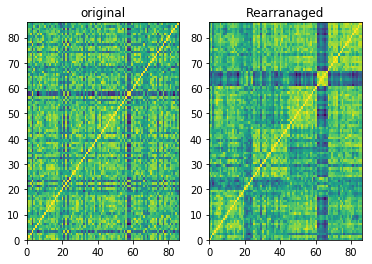

In [17]:
plt.figure()
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("original")

plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranaged")

plt.show()

Demonstration of an interactive grid plot using Bokeh. Make sure to study this code now, as we will edit similar code in the exercises that follow.

In [25]:
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!

from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.plotting import figure, show


import numpy as np

# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.

plot_values = [1,2,3,4,5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))
print (alphas)
# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)
# We are ready to make our interactive Bokeh plot!

output_notebook()
fig = figure(tools="hover, save")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
show(fig)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)
['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red']
[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]


Loading BokehJS ...

Create the names and colors we will use to plot the correlation matrix of whisky flavors. Later, we will also use these colors to plot each distillery geographically.

In [27]:
cluster_colors = ["red", "orange", "green", "blue", "purple", "gray"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = {}
for i, regions in enumerate(regions):
    region_colors[regions] = cluster_colors[i]
region_colors

{'Speyside': 'red',
 'Highlands': 'orange',
 'Lowlands': 'green',
 'Islands': 'blue',
 'Campbelltown': 'purple',
 'Islay': 'gray'}

**Correlations** is a two-dimensional **np.array** with both rows and columns corresponding to distilleries and elements corresponding to the flavor correlation of each row/column pair. We will define a list **correlation_colors**, with **string** values corresponding to colors to be used to plot each distillery pair. Low correlations among distillery pairs will be white, high correlations will be a distinct group color if the distilleries from the same group, and gray otherwise.

In [29]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i,j]  < 0.7:             # if low correlation,
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if whisky.Group[i] == whisky.Group[j] :                # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.
correlation_colors

['red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'lightgray',
 'white',
 'white',
 'white',
 'lightgray',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'lightgray',
 'white',
 'white',
 'white',
 'lightgray',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'red',


In [31]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors, #To convert correlations from a np.array to a list, use the flatten()
        "correlations": correlations.flatten(),
    }
)

output_notebook()
fig = figure(title="Whisky Correlations",
    x_axis_location="above", tools="hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

Loading BokehJS ...

In [40]:
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ["red", "blue", "green"]

location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)
output_notebook()

fig = figure(title = "Title",
    x_axis_location = "above", tools="hover, save")
fig.plot_width  = 300
fig.plot_height = 380
fig.circle("x", "y", size=10, source=location_source,color='colors', line_color = None)
#  Circle(x="x", y="y", size="sizes", line_color="#3288bd", fill_color="white", line_width=3)
#            ([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)

Loading BokehJS ...

we will define a function **location_plot(title, colors)** that takes a string title and a list of colors corresponding to each distillery and outputs a Bokeh plot of each distillery by latitude and longitude. It will also display the distillery name, latitude, and longitude as hover text.

In [46]:
# edit this to make the function `location_plot`.
def location_plot(title,colors ):
    output_notebook()
    location_source = ColumnDataSource(
        data={
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )
    
    fig = figure(title = title,
        x_axis_location = "above", tools=" hover, save")
    fig.plot_width  = 400
    fig.plot_height = 500
    fig.circle("x", "y", size=9, source=location_source ,color='colors',line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)

region_cols = [region_colors[i] for i in list(whisky["Region"])]
print(region_cols)

location_plot("Whisky Locations and Regions", region_cols)

['orange', 'red', 'red', 'red', 'red', 'green', 'red', 'red', 'gray', 'orange', 'green', 'red', 'red', 'orange', 'red', 'red', 'red', 'red', 'orange', 'blue', 'purple', 'blue', 'gray', 'orange', 'orange', 'orange', 'red', 'red', 'orange', 'purple', 'red', 'red', 'red', 'orange', 'blue', 'red', 'orange', 'red', 'red', 'red', 'orange', 'red', 'orange', 'red', 'orange', 'red', 'orange', 'red', 'gray', 'green', 'red', 'red', 'orange', 'orange', 'red', 'red', 'blue', 'orange', 'red', 'red', 'red', 'gray', 'orange', 'blue', 'gray', 'gray', 'gray', 'red', 'red', 'orange', 'red', 'red', 'red', 'orange', 'orange', 'red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'red', 'blue', 'orange']


Loading BokehJS ...

we will use **location_plot** function to plot each distillery, colored by region and taste coclustering classification, respectively.

In [47]:
region_cols = [region_colors[i] for i in list(whisky["Region"])]
classification_cols =[cluster_colors[i] for i in list(whisky["Group"])]

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)

Loading BokehJS ...

Loading BokehJS ...